
# Machine learning Case Study


## 1) Dataset understanding

* This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

* Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

>Pregnancies: Number of times pregnant <br>
>Glucose: Plasma glucose concentration<br>
>BloodPressure: Diastolic blood pressure(mm Hg)<br>
>SkinThickness: Triceps skin fold thickness (mm)<br>
>Insulin: 2-Hour serum insulin (mu U/ml)<br>
>BMI: Body mass index (weight in kg/(height in m)^2)<br>
>DiabetesPedigreeFunction: Diabetes pedigree function<br>
>Age: Age (years)<br>
>Outcome: Class variable (0 or 1)<br>

* It is a labeled dataset. That is , it is used for supervised learning.

### Importing Libraries

In [481]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the Dataset

In [482]:
df= pd.read_csv("/content/diabetes.csv")
x = df.drop(columns='Outcome') 
y = df['Outcome']
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Splitting the dataset into Training and Testing set

In [483]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [484]:
print(x_train)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
762            9       89             62              0        0  22.5   
127            1      118             58             36       94  33.3   
564            0       91             80              0        0  32.4   
375           12      140             82             43      325  39.2   
663            9      145             80             46      130  37.9   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
192            7      159             66              0        0  30.4   
629            4       94             65             22        0  24.7   
559           11       85             74              0        0  30.1   
684            5      136             82              0        0   0.0   

     DiabetesPedigreeFunction  Age  
762                     0.142   33  
127                     0.261   23  


In [485]:
print(y_train)

762    0
127    0
564    0
375    1
663    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 576, dtype: int64


In [486]:
print(x_test)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
661            1      199             76             43        0  42.9   
122            2      107             74             30      100  33.6   
113            4       76             62              0        0  34.0   
14             5      166             72             19      175  25.8   
529            0      111             65              0        0  24.6   
..           ...      ...            ...            ...      ...   ...   
366            6      124             72              0        0  27.6   
301            2      144             58             33      135  31.6   
382            1      109             60              8      182  25.4   
140            3      128             78              0        0  21.1   
463            5       88             78             30        0  27.6   

     DiabetesPedigreeFunction  Age  
661                     1.394   22  
122                     0.404   23  


In [487]:
print(y_test)

661    1
122    0
113    0
14     1
529    0
      ..
366    1
301    1
382    0
140    0
463    0
Name: Outcome, Length: 192, dtype: int64


### Feature scaling 
It is a method used to normalize the range of independent variables or features of data.

In [488]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [489]:
print(x_train)

[[ 1.50755225 -1.01521454 -0.40451932 ... -1.22070104 -0.98325882
  -0.04863985]
 [-0.82986389 -0.09964691 -0.61509602 ...  0.13719053 -0.62493647
  -0.88246592]
 [-1.12204091 -0.95207195  0.54307587 ...  0.0240329   0.39884168
  -0.5489355 ]
 ...
 [ 0.04666716 -0.85735805 -0.24658679 ... -0.9440935  -0.96519215
  -1.04923114]
 [ 2.09190629 -1.14149973  0.2272108  ... -0.26514771 -0.5075031
   0.11812536]
 [ 0.33884418  0.46863645  0.64836422 ... -4.04964181  0.51627505
   2.953134  ]]


In [490]:
print(x_test)

[[-0.82986389  2.4576282   0.33249916 ...  1.34420526  2.78665365
  -0.96584853]
 [-0.53768687 -0.44693118  0.2272108  ...  0.17490974 -0.19434743
  -0.88246592]
 [ 0.04666716 -1.42564141 -0.40451932 ...  0.22520202 -0.23349189
  -0.71570071]
 ...
 [-0.82986389 -0.38378859 -0.50980767 ... -0.85608201  1.4406865
  -1.04923114]
 [-0.24550986  0.21606607  0.43778751 ... -1.39672402 -0.60385869
   1.7857775 ]
 [ 0.33884418 -1.04678584  0.43778751 ... -0.57947447 -0.63396981
   0.28489057]]


## Training Logistic Regression Model (Training Set)


In [491]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

### Creating a Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

In [494]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
df_cm.rename(columns={0:'Not Diabetes', 1:'Diabetes'}, index={0:'Not Diabetes', 1:'Diabetes'}, inplace=True)
df_cm

,Not Diabetes,Diabetes
Not Diabetes,118,12
Diabetes,26,36


### Classification Report
It is a performance evaluation metric in machine learning.

In [495]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.819     0.908     0.861       130
           1      0.750     0.581     0.655        62

    accuracy                          0.802       192
   macro avg      0.785     0.744     0.758       192
weighted avg      0.797     0.802     0.795       192



In [496]:
print('Accuracy\t: ', round(metrics.accuracy_score(y_test, y_pred),3))
print('Precision\t: ', round(metrics.precision_score(y_test, y_pred, average='macro'),3)) 
print('Recall\t\t: ', round(metrics.recall_score(y_test, y_pred, average='macro'),3))

Accuracy	:  0.802
Precision	:  0.785
Recall		:  0.744


In [497]:
from sklearn.neighbors import KNeighborsClassifier

In [498]:
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=23)

In [499]:
pred=knn.predict(x_test)

In [500]:
print("Accuracy:",metrics.accuracy_score(y_test, pred))
print("Precision:",metrics.precision_score(y_test, pred))
print("Recall:",metrics.recall_score(y_test, pred))

Accuracy: 0.7604166666666666
Precision: 0.7105263157894737
Recall: 0.43548387096774194


#2) Visualization
### Visualizing the Sigmoid Graph for each feature.

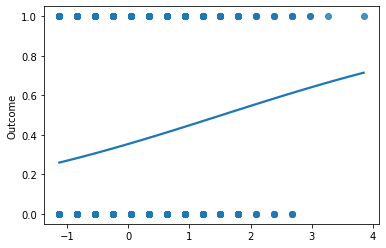

In [501]:
import seaborn as sns
sns.regplot(x=x_train[:,0], y=y_train, data=df, logistic=True, ci=None)

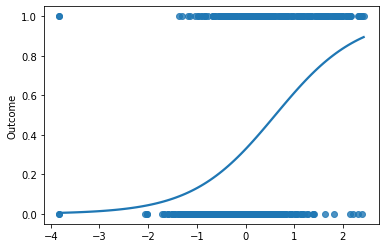

In [502]:
sns.regplot(x=x_train[:,1], y=y_train, data=df, logistic=True, ci=None)

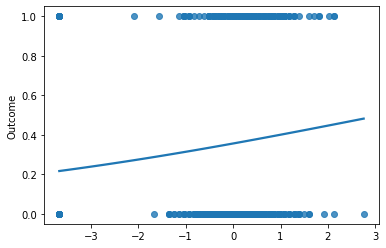

In [503]:
sns.regplot(x=x_train[:,2], y=y_train, data=df, logistic=True, ci=None)

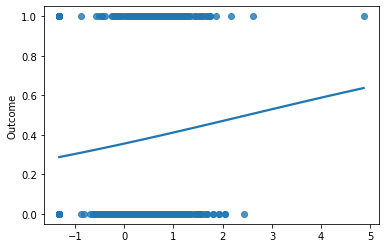

In [504]:
sns.regplot(x=x_train[:,3], y=y_train, data=df, logistic=True, ci=None)

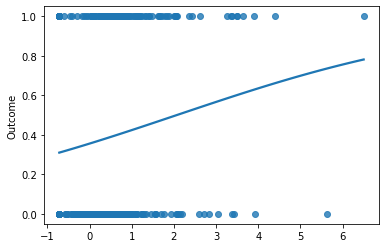

In [505]:
sns.regplot(x=x_train[:,4], y=y_train, data=df, logistic=True, ci=None)

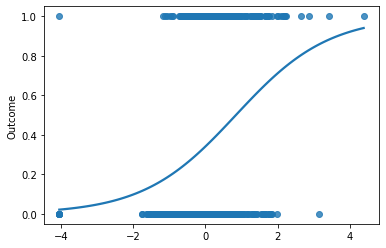

In [506]:
sns.regplot(x=x_train[:,5], y=y_train, data=df, logistic=True, ci=None)

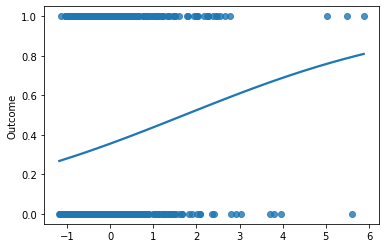

In [507]:
sns.regplot(x=x_train[:,6], y=y_train, data=df, logistic=True, ci=None)

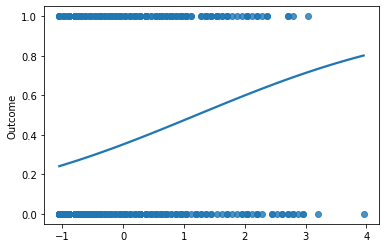

In [508]:
sns.regplot(x=x_train[:,7], y=y_train, data=df, logistic=True, ci=None)

## 3) Algorithm

Logistic regression is basically a supervised classification algorithm. In a classification problem, the target variable(or output), y, can take only discrete values for a given set of features(or inputs), X.
Contrary to popular belief, logistic regression IS a regression model. The model builds a regression model to predict the probability that a given data entry belongs to the category numbered as “1”. Just like Linear regression assumes that the data follows a linear function, Logistic regression models the data using the sigmoid function. Here, we use logistic regression because its a binary classification problem. We decide whether a person has purchased a good or not.

## 4) Summary

In this case study the dataset taken was "diabetes.csv" and here Logistic Regression was applied because it is a classification type of regression and the answer is either 'True' or 'False'. The model built achieved an accuracy of 0.802 , which was later compared to KNN which only achieved 0.76. Sigmoid graphs were visualized for each feature which lied between 0 and 1.